# Bushfire Analysis using Meteorological Data


Student information
- Family Name: Hung
- Given Name: Tang-wei
- Student ID: 29375932
- Student email: thun0004@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- library(GGally)
- library(ggplot2)
- library(reshape2)
- library(stats)
- library(scales)
- library(gridExtra)
- library(lattice)
- library(RColorBrewer)
- library(psych)
- library(rsq)
- library(grid)

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
    * [Statistical Exploration](#sec_2_1)
    * [Distribution of variables](#sec_2_2)
        * [Box plots](#sec_2_2_1)
        * [Histograms](#sec_2_2_2)
        * [Bar charts](#sec_2_2_3)
    * [Log-normal distribution](#sec_2_3)
    * [Correlations](#sec_2_4)
* [Model Development](#sec_3)
    * [Prepare the Data Frame](#sec_3_1)
    * [First Model](#sec_3_2)
    * [Second Model](#sec_3_3)
    * [Third Model](#sec_3_4)
    * [Fourth Model](#sec_3_5)
* [Model Comparison](#sec_4)
    * [RSE, R-squared, F-statistic](#sec_4_1)
    * [Normality, Linearity, Constant variance, and Residuals vs Leverage.](#sec_4_2)
    * [RMSE and MAE](#sec_4_3)
* [Conclusion](#sec_6)

## 1. Introduction <a class="anchor" id="sec_1"></a>

In this report, we will use the dataset which is collected from the northeast region of Portugal between January 2000 and December 2003 to explore machine learning approaches to predict the burned area of bushfires. We will build statistical models that could predict the burned area of the bushfires.
<br>

We will first explore the data, develope three models and then compare these three models to understand how the burned area of forest fires in the northeast region of Portugal.

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In data exploration, we will focus on the statistical exploration, the distribution of variables, using a log scale to see if these variables have a log-normal distribution, and correlations between the variables.

In [2]:
# close the warning
options(warn=-1)
# Read the library
library(GGally)
library(ggplot2)
library(reshape2)
library(lattice)
library(stats)
library(scales)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(psych)
library(rsq)

In [3]:
# Read the data as fireData
fireData <- read.csv("forestfires.csv")

### Statistical Exploration<a class="anchor" id="sec_2_1"></a>

In [4]:
# display the dimemsions in this data set
cat("The fire dataset has", dim(fireData)[1], "records, each with", dim(fireData)[2],
    "attributes.")

The fire dataset has 517 records, each with 13 attributes.

In [5]:
# Display the structure
str(fireData)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


We could notice that only month and day are factor variables, all other variables are numaric variables.

In [6]:
# Display first few rows in this data set.
cat("The first few rows:")
head(fireData)

The first few rows:

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [7]:
# Display last few rows in this data set.
cat("The last few rows:")
tail(fireData)

The last few rows:

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0,0.00
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.00
517,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0,0.00


In [8]:
cat("\nBasic statistics for each attribute are:")
# Statistical summary 
round(describe(fireData), 3)


Basic statistics for each attribute are:

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X,1,517,4.669,2.314,4.00,4.672,2.965,1.0,9.00,8.00,0.036,-1.180,0.102
Y,2,517,4.300,1.230,4.00,4.308,1.483,2.0,9.00,7.00,0.415,1.378,0.054
month*,3,517,6.758,4.373,7.00,6.720,7.413,1.0,12.00,11.00,0.084,-1.719,0.192
day*,4,517,3.737,1.925,4.00,3.672,2.965,1.0,7.00,6.00,0.157,-1.109,0.085
FFMC,5,517,90.645,5.520,91.60,91.455,1.927,18.7,96.20,77.50,-6.537,66.139,0.243
DMC,6,517,110.872,64.046,108.30,106.522,51.743,1.1,291.30,290.20,0.544,0.179,2.817
DC,7,517,547.940,248.066,664.20,578.692,118.905,7.9,860.60,852.70,-1.094,-0.265,10.910
ISI,8,517,9.022,4.559,8.40,8.727,3.113,0.0,56.10,56.10,2.522,21.146,0.201
temp,9,517,18.889,5.807,19.30,19.091,5.337,2.2,33.30,31.10,-0.329,0.111,0.255
RH,10,517,44.288,16.317,42.00,42.706,14.826,15.0,100.00,85.00,0.858,0.409,0.718


Some observations from the Summary:

* There are a big range for fire area from zero to 1090.84, DC from 7.9 to 860.60, and DMC from 1.1 to 291.30 across the samples.
* ISI, rain, and area min are 0.
* The temperature varies quite a bit from 2.2 to 33.30 in Celsius degrees.
* The range for FFMC index is quite high with minimum being 18.7 and maximum being 96.2
* Wind speed value varies from 0.4 to 9.4, seem quite low. 
* Rain has an extremely small range.

<div class="alert alert-block alert-warning">
   We can compare the standard deviation for variables:

In [9]:
cat("The standard deviation for each attribute are:")
# display the standard deviation for variables and sort the result.
sort(apply(fireData[c(-3,-4)], 2, sd))

The standard deviation for each attribute are:

rain           Y        wind           X         ISI        FFMC 
  0.2959591   1.2299004   1.7916526   2.3137778   4.5594772   5.5201108 
       temp          RH        area         DMC          DC 
  5.8066253  16.3174692  63.6558185  64.0464822 248.0661917

The lowest standard deviation is for "rain" variable, and "DC" has the highest standard deviation in this fire data set.

In [10]:
cat("The numbers of unique values for each attribute are:")
apply(fireData, 2, function(x) length(unique(x)))

The numbers of unique values for each attribute are:

X     Y month   day  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area 
    9     7    12     7   106   215   219   119   192    75    21     7   251

<div class="alert alert-block alert-warning">
   Summary of Attributes

The following table will show the attributes which are numerical and which are categorical and then describe the attributes. 

|Attribute  |Type       |Sub-type  |Comments                                                                              |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|X         |Numerical   |Discrete   |x-axis spatial coordinate for 1 to 9 in Montesinho park map|
|Y         |Numerical   |Discrete   |y-axis spatial coordinate for 1 to 9 in Montesinho park map| 
|month     |Categorical |Ordinal    |Month of the year from January to December|
|day       |Categorical |Ordinal    |Day of the week from Monday to Sunday|
|FFMC      |Numerical   |Continuous |Fine Fuel Moisture Code from the Fire Weather Index from 18.7 to 96.2 |
|DMC       |Numerical   |Continuous |Duff Moisture Code from the Fire Weather Index from 1.1 to 291.3 |
|DC        |Numerical   |Continuous |Drought Code from the Fire Weather Index from 7.9 to 860.6|
|ISI       |Numerical   |Continuous |Initial Spread Index from the Fire Weather Index from 0.0 to 56.10|
|temp      |Numerical   |Continuous |Temperature in Celsius degress from 2.2 to 33.30|
|RH        |Numerical   |Continuous |Relative humidity from 15.0 to 100 in %|
|wind      |Numerical   |Continuous |Wind speed from 0.4 to 9.4 in km/h|
|rain      |Numerical   |Continuous |Rain from 0.0 to 6.4 in mm/m2|
|area      |Numerical   |Continuous |The burned area of the forest from 0.0 to 1090.84 in ha|

### Distribution of variables<a class="anchor" id="sec_2_2"></a>
In this section, we will show the distribution of variables by using boxplot, bar chart and histogram.

##### Box plots:<a class="anchor" id="sec_2_2_1"></a>

Using month, day as id variables


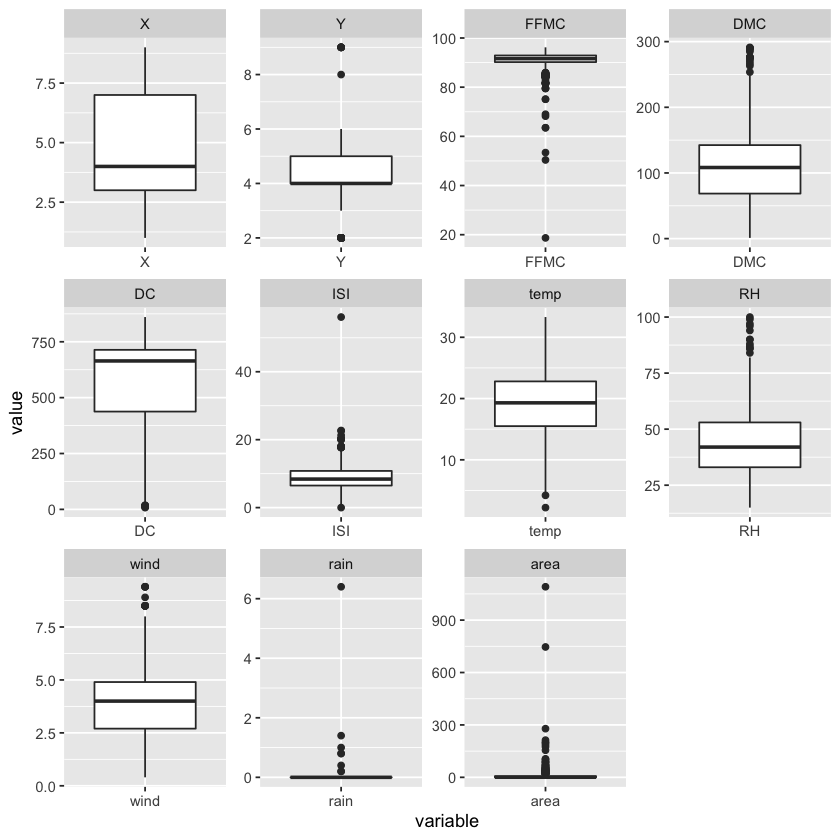

In [11]:
fireData.m <- melt(as.data.frame(fireData))
#plot the graph
ggplot(fireData.m,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

In these box plots, we could notice that the attributes of area and rain have many zero value in fire dataset. 
Besides, in FFMC, the main range is around 90, and there are a lot of outlies display in the box plots.

##### histograms:<a class="anchor" id="sec_2_2_2"></a>

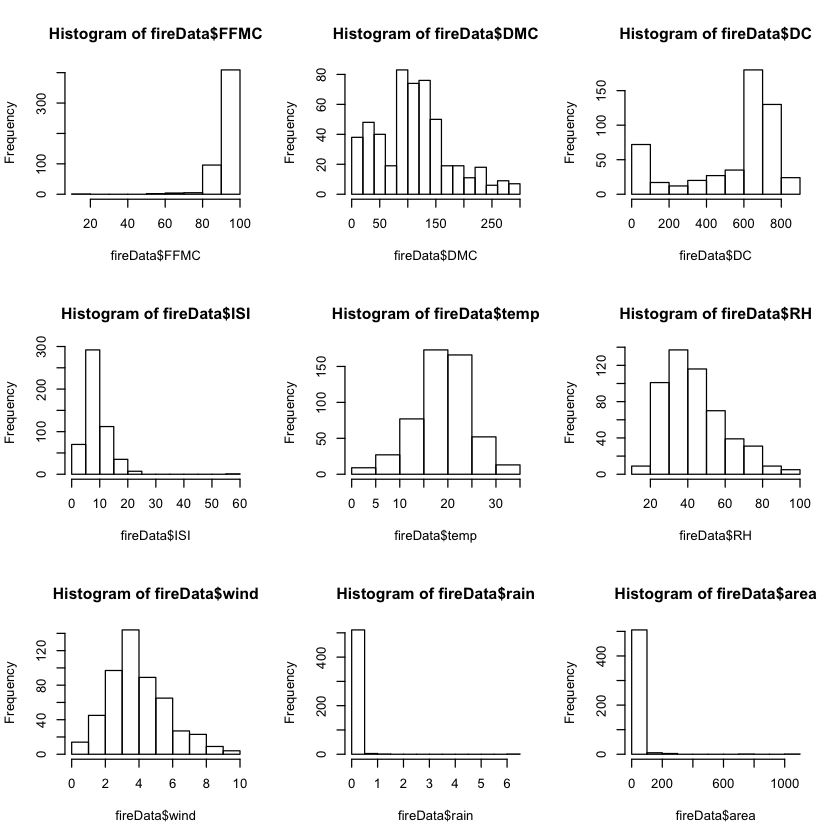

In [12]:
par(mfrow = c(3,3))
#plot the graph
hist(fireData$FFMC)
hist(fireData$DMC)
hist(fireData$DC)
hist(fireData$ISI)
hist(fireData$temp)
hist(fireData$RH)
hist(fireData$wind)
hist(fireData$rain)
hist(fireData$area)

**In these histograms:**
* The distribution of FFMC and DC data are skewed to the left.
* The distribution of DMC, ISI, RH, wind, rain and area data are skewed to the right.
* The distribution of temp is like normal distribution.

##### Bar charts:<a class="anchor" id="sec_2_2_3"></a>

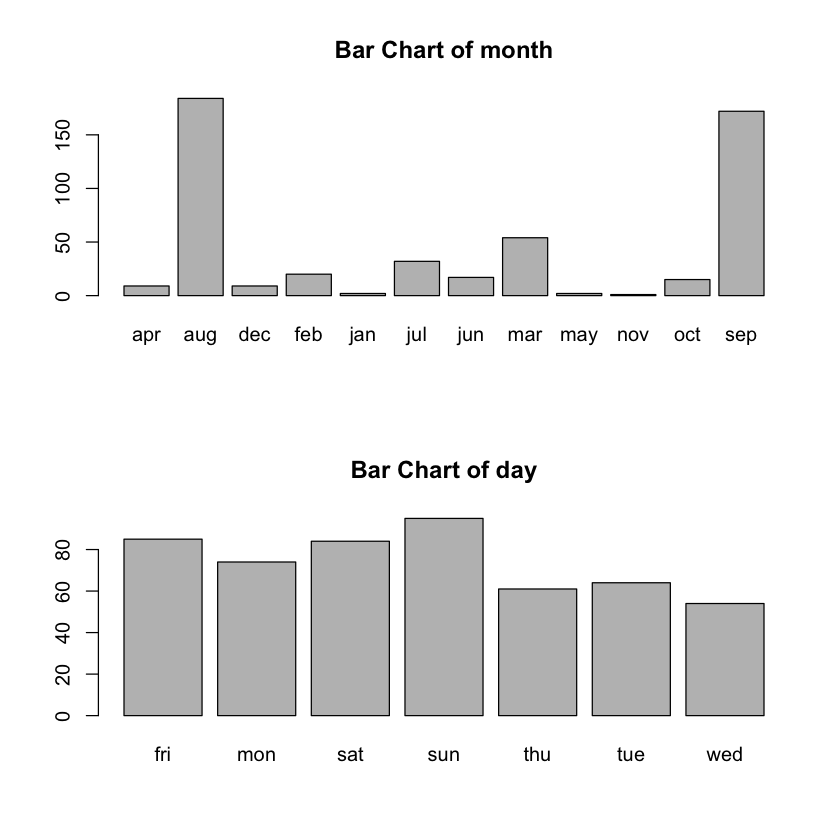

In [13]:
par(mfrow = c(2,1))
#plot the graph
plot(as.factor(fireData$month),main="Bar Chart of month") 
plot(as.factor(fireData$day),main="Bar Chart of day")

**These bar charts show:**
* In bar charts, we could notice that the auguest and septemper have higher forest fire records than other months.
* Besides, in week day, Friday, Monday, Saturday, and sunday have similar number of forest fire records.

### Use a log scale to see if these variables have a log-normal distribution<a class="anchor" id="sec_2_3"></a>
Replot DMC, DC, ISI, RH, wind, and area using a log scale to see if these variables have a log-normal distribution

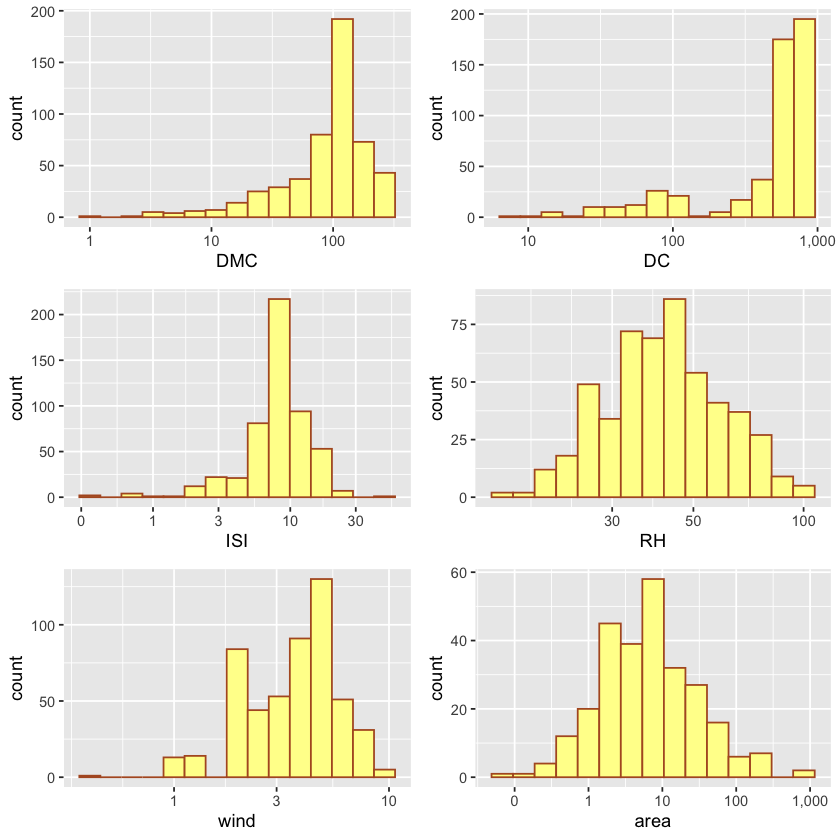

In [14]:
# Set some colours using Colorbrewer
gg.colour <- brewer.pal(12,"Paired")[12]
gg.fill <- brewer.pal(12,"Paired")[11]

# plot the graphs by using log scales
p1 <- ggplot(aes(x=DMC), data=fireData) +
      geom_histogram(bins=15, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma)
p2 <- ggplot(aes(x=DC), data=fireData) +
      geom_histogram(bins=15, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma)
p3 <- ggplot(aes(x=ISI), data=fireData) +
      geom_histogram(bins=15, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma)
p4 <- ggplot(aes(x=RH), data=fireData) +
      geom_histogram(bins=15, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma)
p5 <- ggplot(aes(x=wind), data=fireData) +
      geom_histogram(bins=15, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma)
p6 <- ggplot(aes(x=area), data=fireData) +
      geom_histogram(bins=15, colour=gg.colour, fill=gg.fill) +
      scale_x_log10(labels=comma)
grid.arrange(p1, p2, p3, p4, p5, p6,ncol=2, nrow=3)

**These graphs show:**
- The log of area and RH are (nearly) normally distributed.
- The log of the DMC, DC, ISI, and wind are still not quite normal. 

### Correlations between the variables<a class="anchor" id="sec_2_4"></a>

In [15]:
# select numeric attribute in fireData
fireData_numeric <- fireData[c('X','Y','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area')]

cor(fireData_numeric)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000000,0.539548171,-0.02103927,-0.048384178,-0.08591612,0.006209941,-0.05125826,0.08522319,0.01879782,0.065387168,0.063385299
Y,0.539548171,1.000000000,-0.04630755,0.007781561,-0.10117777,-0.024487992,-0.02410308,0.06222073,-0.02034085,0.033234103,0.044873225
FFMC,-0.021039272,-0.046307546,1.00000000,0.382618800,0.33051180,0.531804931,0.43153226,-0.30099542,-0.02848481,0.056701533,0.040122004
DMC,-0.048384178,0.007781561,0.38261880,1.000000000,0.68219161,0.305127835,0.46959384,0.07379494,-0.10534225,0.074789982,0.072994296
DC,-0.085916123,-0.101177767,0.33051180,0.682191612,1.00000000,0.229154169,0.49620805,-0.03919165,-0.20346569,0.035860862,0.049383225
ISI,0.006209941,-0.024487992,0.53180493,0.305127835,0.22915417,1.000000000,0.39428710,-0.13251718,0.10682589,0.067668190,0.008257688
temp,-0.051258262,-0.024103084,0.43153226,0.469593844,0.49620805,0.394287104,1.00000000,-0.52739034,-0.22711622,0.069490547,0.097844107
RH,0.085223194,0.062220731,-0.30099542,0.073794941,-0.03919165,-0.132517177,-0.52739034,1.00000000,0.06941007,0.099751223,-0.075518563
wind,0.018797818,-0.020340852,-0.02848481,-0.105342253,-0.20346569,0.106825888,-0.22711622,0.06941007,1.00000000,0.061118880,0.012317277
rain,0.065387168,0.033234103,0.05670153,0.074789982,0.03586086,0.067668190,0.06949055,0.09975122,0.06111888,1.000000000,-0.007365729


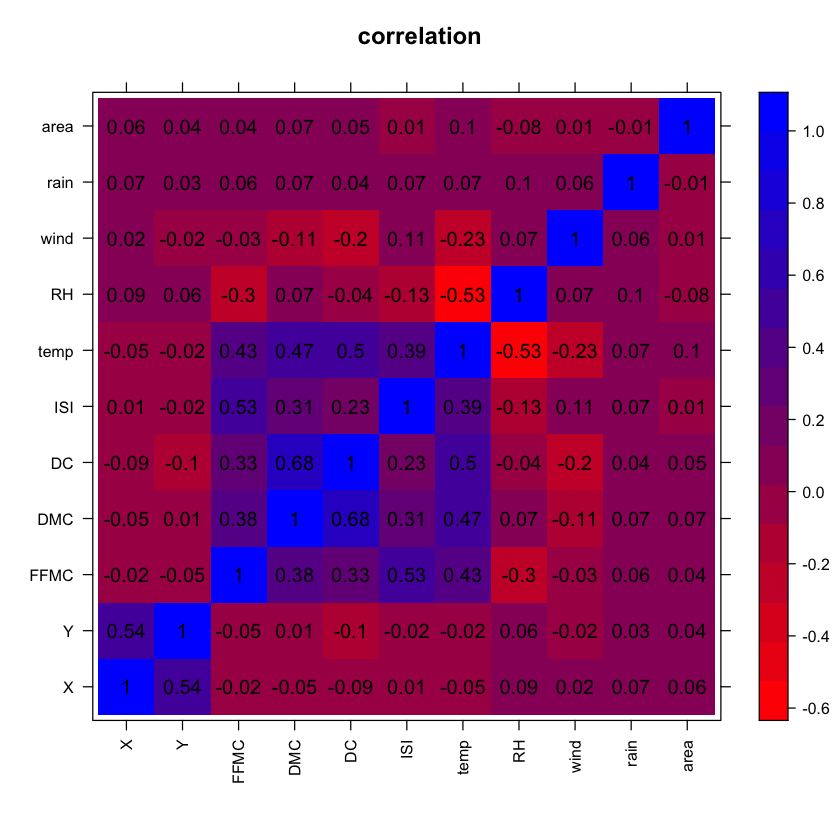

In [16]:
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}
#Define the color
cols = colorRampPalette(c("red","blue"))

#Plot the correlation matrix.
levelplot(cor(fireData_numeric), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

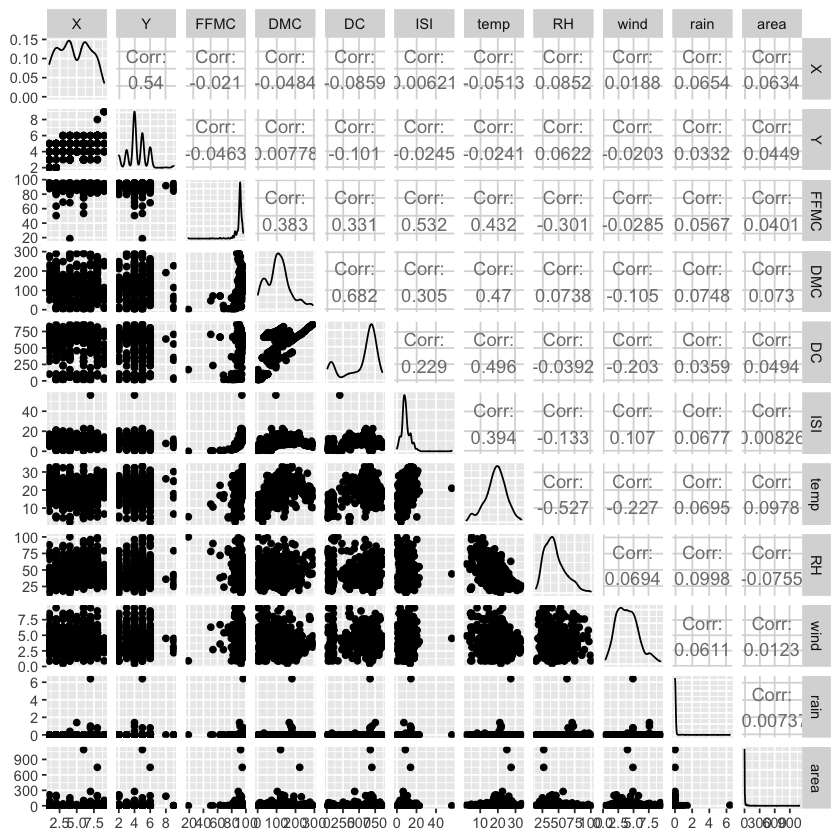

In [17]:
#Plot the correlation matrix.
ggpairs(fireData_numeric)

**The matrix shows:**
* There is quite a strong postive correlation between X and Y
<br>
<br>
* FFMC, DMC, DC, ISI,and temp are all postive correlation to each other.
<br>
<br>
* There is quite a strong negative correlation between temp and RH.
<br>
<br>
* Wind is little negative correlation to DMC, DC, and temp
<br>
<br>
* DMC and DC seem to have linear relationships.
<br>
<br>
* FFMC and ISI seem to have exponential relationships.

## 3. Model Development<a class="anchor" id="sec_3"></a>

In model development, we will prepare the data frame and then build four models.
- The first model tries to fit all variables to see what appears to be important. 
<br>
<br>
- The second model corrects the heteroscedasticity seen in the first model by using a log transformation of the response variable.
<br>
<br>
- The third model expands the second model with interaction effects on DC : DMC, DMC : temp, DC : temp, ISI : FFMC, and RH:temp
<br>
<br>
- The fourth model uses logistic regression and linear regression to build the model.

### Prepare the Data Frame<a class="anchor" id="sec_3_1"></a>
Re-load the data frame and factorise the categorical variables and split the orginal data into training and testing datasets.

In [18]:
# Load the training dataset
fireData <- read.csv("forestfires.csv")
fireData$X = as.factor(fireData$X)
fireData$Y = as.factor(fireData$Y)

In [19]:
# set the seed
set.seed(124)

#divide fireData into training and testing sets
sample_size <- floor(0.8 * nrow(fireData))
train_index <- sample(seq_len(nrow(fireData)), size = sample_size, replace = FALSE)
train <- fireData[train_index, ]
test <- fireData[-train_index, ]


cat("The fire dataset has", dim(fireData)[1], "records, each with", dim(fireData)[2],
    "attributes.\n")
cat("The training dataset has", dim(train)[1], "records, each with", dim(train)[2],
    "attributes.\n")
cat("The testing dataset has", dim(test)[1], "records, each with", dim(test)[2],
    "attributes.\n")

The fire dataset has 517 records, each with 13 attributes.
The training dataset has 413 records, each with 13 attributes.
The testing dataset has 104 records, each with 13 attributes.


### First Model<a class="anchor" id="sec_3_2"></a>

Try fitting all variables to see what appears to be important

In [20]:
# build the regression model with the lm() function. 
model_1 <- lm(area~., data = train)
# summary the model
summary(model_1)


Call:
lm(formula = area ~ ., data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-46.01 -14.67  -5.41   3.42 691.51 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -10.56208   73.51280  -0.144  0.88583   
X2           -0.12924    9.67826  -0.013  0.98935   
X3           -5.58320   11.08948  -0.503  0.61493   
X4            3.42307   10.29432   0.333  0.73968   
X5           -6.74240   14.01636  -0.481  0.63077   
X6            5.48888   10.79839   0.508  0.61154   
X7            5.02957   11.04543   0.455  0.64912   
X8           17.34217   14.46780   1.199  0.23142   
X9           26.16457   20.86553   1.254  0.21064   
Y3          -11.65032   12.31945  -0.946  0.34492   
Y4           -6.75301   10.24419  -0.659  0.51017   
Y5          -12.80135   11.00566  -1.163  0.24551   
Y6           -1.92558   14.70017  -0.131  0.89585   
Y8          144.90278   49.79686   2.910  0.00383 **
Y9          -47.94100   28.73401  -1.668  0.09607 . 
monthaug 

According to the summary:
- The p-values for the coefficients show all the non-factor variables are not significant at the 0.05 level. The factors only Y8 has significant at the 0.05 level and Y9 at the 0.1 level.
<br> 
<br> 
- The Residual standard error is 46.36. <br> 
  area mean = 12.85<br> 
  The percentage error: 46.36/12.85 = 360.77%<br> 
  It means the quality of a linear regression fit is very worse.
<br> 
<br> 
- The Adjusted R-squared value in first model only explains 0.5% of the variation in forest fire area. 
<br> 
<br> 
- The F-value in first model is 1.061 and is very close to 1. It's means there is no relationship between forest fore area and X, Y, month, day, FFMC, DMC, DC,ISI, temp, RH, wind, and rain.
<br> 
<br> 
- The F-statistic 1.061 has a p-value equal to 0.3763. Therefore, we could not reject the null hypothesis, and means this model is unuseful.


#### Select the best regression variables by using the step function

In [21]:
# remove unimportant variables
model_1_step <- step(model_1)

Start:  AIC=3206.77
area ~ X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + 
    wind + rain

        Df Sum of Sq    RSS    AIC
- month 11   10114.6 811688 3190.0
- X      8   12607.5 814180 3197.2
- day    6    6314.9 807888 3198.0
- FFMC   1      18.7 801592 3204.8
- ISI    1      47.5 801620 3204.8
- RH     1     152.7 801726 3204.9
- rain   1     220.1 801793 3204.9
- wind   1    2693.4 804266 3206.2
- temp   1    2917.9 804491 3206.3
<none>               801573 3206.8
- DC     1    3901.3 805474 3206.8
- DMC    1    7350.7 808924 3208.5
- Y      6   30261.9 831835 3210.1

Step:  AIC=3189.95
area ~ X + Y + day + FFMC + DMC + DC + ISI + temp + RH + wind + 
    rain

       Df Sum of Sq    RSS    AIC
- X     8   10875.0 822563 3179.5
- day   6    5823.2 817511 3180.9
- FFMC  1      41.4 811729 3188.0
- rain  1     222.9 811911 3188.1
- ISI   1     504.6 812192 3188.2
- RH    1     671.2 812359 3188.3
- DC    1    1636.0 813324 3188.8
- temp  1    1814.6 813502 3188.9
- wind

As shown above, the best model is selected based on AIC after ten steps. The best model has temp and Yas predictors. In addition, the AIC drops from 3206.77 to 3159.86

In [22]:
summary(model_1_step)


Call:
lm(formula = area ~ Y + temp, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-33.14 -11.95  -7.36  -1.04 713.36 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1760    10.5946   0.205 0.837373    
Y3           -7.3427     9.7329  -0.754 0.451037    
Y4           -6.3124     8.2021  -0.770 0.441984    
Y5           -8.7195     8.7024  -1.002 0.316963    
Y6           10.4683     9.5590   1.095 0.274114    
Y8          164.2709    46.0696   3.566 0.000406 ***
Y9          -16.2230    19.9519  -0.813 0.416636    
temp          0.7371     0.3789   1.946 0.052391 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.42 on 405 degrees of freedom
Multiple R-squared:  0.06186,	Adjusted R-squared:  0.04565 
F-statistic: 3.815 on 7 and 405 DF,  p-value: 0.0004995


**Summay of first model by using step:**

* The Residual standard error drops slightly from 46.36 to 45.42. It's not a significant improvement by using step.
<br>
<br>
* The Adjusted R-squared value increase to explains 4% of the variation in forest fire area.
<br>
<br>
* The F-statistic value increase slightly form 1.061 to 3.815, and it means the step function improve the performance.
<br>
<br>
* The attributes of Y8 seems to have a significant impact on the prediction of the  burned area than other attributes in this model. This is because this attribute has samll p-value less than 0.001.


### Second Model<a class="anchor" id="sec_3_3"></a>
The second model corrects the heteroscedasticity seen in the first model by using a log transformation of the response variable.

In [23]:
# build the regression model with the lm() function. 
model_2 <- lm(log(area+1) ~ . + log(RH+1)+log(ISI+1)+log(wind+1)+ log(FFMC+1), data=train)
# summary the model
summary(model_2)


Call:
lm(formula = log(area + 1) ~ . + log(RH + 1) + log(ISI + 1) + 
    log(wind + 1) + log(FFMC + 1), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1083 -1.0494 -0.3701  0.7893  4.8604 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -21.355965  56.043557  -0.381  0.70338   
X2              0.003519   0.291724   0.012  0.99038   
X3             -0.853046   0.333103  -2.561  0.01084 * 
X4              0.023413   0.308815   0.076  0.93961   
X5             -0.614333   0.420138  -1.462  0.14453   
X6              0.027431   0.323963   0.085  0.93257   
X7             -0.249415   0.332409  -0.750  0.45354   
X8              0.109415   0.435779   0.251  0.80189   
X9              1.367338   0.627649   2.179  0.03000 * 
Y3              0.368772   0.370186   0.996  0.31981   
Y4              0.571800   0.307977   1.857  0.06416 . 
Y5              0.309101   0.330586   0.935  0.35040   
Y6              0.561059   0.445766   1.259 

According to the summary:
- The p-values for the coefficients show the non-factor variables significant level. The factors Y8 has significant at the 0.01 level. Besides, the factors X3, X9, Y9, monthdec have significant at 0.05 level.
<br> 
<br> 
- The Residual standard error is 1.388 <br> 
  area mean = 12.85<br> 
  The percentage error: 1.388/12.85 = 10.80%<br> 
  This reslut is better than first model.
<br> 
<br> 
- The Adjusted R-squared value in second model only explains 4% of the variation in forest fire area. 
<br> 
<br> 
- The F-value in first model is 1.495 and is very close to 1. It's means there is no relationship between forest fore area and X, Y, month, day, FFMC, DMC, DC,ISI, temp, RH, wind, rain, log(RH), log(ISI), log(wind),and log(FFMC).
<br> 
<br> 
- The F-statistic 1.499 has a p-value equal to 0.02738. Therefore, we could not reject the null hypothesis at 0.05 significant level, and means this model is unuseful.

#### Select the best regression variables by using the step function

In [24]:
# remove unimportant variables
model_2_step <- step(model_2)

Start:  AIC=312.4
log(area + 1) ~ X + Y + month + day + FFMC + DMC + DC + ISI + 
    temp + RH + wind + rain + log(RH + 1) + log(ISI + 1) + log(wind + 
    1) + log(FFMC + 1)

                Df Sum of Sq    RSS    AIC
- day            6     5.277 716.36 303.45
- month         11    31.069 742.15 308.06
- log(wind + 1)  1     0.084 711.16 310.45
- FFMC           1     0.165 711.25 310.49
- log(FFMC + 1)  1     0.179 711.26 310.50
- rain           1     0.370 711.45 310.61
- wind           1     0.509 711.59 310.69
- ISI            1     0.525 711.61 310.70
- log(ISI + 1)   1     0.583 711.66 310.74
<none>                       711.08 312.40
- DMC            1     3.509 714.59 312.43
- temp           1     3.595 714.68 312.48
- RH             1     3.646 714.73 312.51
- log(RH + 1)    1     3.755 714.84 312.57
- DC             1     3.963 715.04 312.69
- X              8    41.783 752.86 319.98
- Y              6    36.465 747.55 321.05

Step:  AIC=303.45
log(area + 1) ~ X + Y + month +

As shown above, the best model is selected based on AIC after 12 steps. The best model has temp and Yas predictors. In addition, the AIC drops from 312.4 to 282.08

In [25]:
summary(model_2_step)


Call:
lm(formula = log(area + 1) ~ X + Y + RH + wind, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-2.505 -1.106 -0.402  0.888  4.888 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.940147   0.347896   2.702  0.00718 **
X2          -0.050326   0.281310  -0.179  0.85811   
X3          -0.903116   0.319753  -2.824  0.00498 **
X4           0.051922   0.295662   0.176  0.86069   
X5          -0.643395   0.406969  -1.581  0.11469   
X6          -0.065343   0.305182  -0.214  0.83057   
X7          -0.272195   0.316462  -0.860  0.39024   
X8          -0.115888   0.416413  -0.278  0.78093   
X9           1.162214   0.578405   2.009  0.04518 * 
Y3           0.413388   0.348020   1.188  0.23561   
Y4           0.608361   0.294710   2.064  0.03964 * 
Y5           0.365781   0.313438   1.167  0.24391   
Y6           0.789059   0.413710   1.907  0.05721 . 
Y8           4.383552   1.448450   3.026  0.00264 **
Y9          -1.582109   0.819998  -1.

**Summay of second model by using step:**

* The Residual standard error drops slightly from 1.388 to 1.379. It's not a significant improvement by using step.
<br>
<br>
* The Adjusted R-squared value increases explanation form 4% to 6% of the variation in forest fire area.
<br>
<br>
* The F-statistic value increase slightly form 1.061 to 2.695, and it means the step function improve the performance.
<br>
<br>
* The attributes of X3, X9, Y4, Y8 seems to have a significant impact on the prediction of the  burned area than other attributes in this model. This is because these attributes have samll p-value less than 0.05.

### Third Model<a class="anchor" id="sec_3_4"></a>
In this model, we will expand the second model with interaction effects on DC : DMC, DMC : temp, DC : temp, ISI : FFMC, and RH:temp

In [26]:
# build the regression model with the lm() function.
model_3 <- lm(log(area+1) ~ . + log(RH)+log(ISI)+log(wind)+ log(FFMC) + DC:DMC +  DMC:temp + DC:temp + ISI:FFMC + RH:temp, data=train)
# summary the model
summary(model_3)


Call:
lm(formula = log(area + 1) ~ . + log(RH) + log(ISI) + log(wind) + 
    log(FFMC) + DC:DMC + DMC:temp + DC:temp + ISI:FFMC + RH:temp, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0234 -0.9854 -0.3271  0.8176  4.6697 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -9.104e+01  7.880e+01  -1.155   0.2487  
X2           2.601e-02  2.927e-01   0.089   0.9292  
X3          -8.477e-01  3.345e-01  -2.535   0.0117 *
X4           4.899e-02  3.153e-01   0.155   0.8766  
X5          -5.927e-01  4.240e-01  -1.398   0.1630  
X6          -3.110e-03  3.276e-01  -0.009   0.9924  
X7          -2.657e-01  3.338e-01  -0.796   0.4266  
X8           2.366e-01  4.404e-01   0.537   0.5914  
X9           1.646e+00  6.478e-01   2.541   0.0115 *
Y3           2.877e-01  3.764e-01   0.764   0.4452  
Y4           5.343e-01  3.086e-01   1.731   0.0842 .
Y5           2.463e-01  3.319e-01   0.742   0.4585  
Y6           3.756e-01  4.547e-01   0.826  

According to the summary:
- The p-values for the coefficients show the non-factor variables significant level. The factors X3, X9, Y8,and Y9 have significant at 0.05 level. Besides, the factor Y4 has significant at 0.1 level.
<br> 
<br> 
- The Residual standard error is 1.387 <br> 
  area mean = 12.85<br> 
  The percentage error: 1.387/12.85 = 10.79%<br> 
  This reslut is same as second model.
<br> 
<br> 
- The Adjusted R-squared value in third model only explains 5% of the variation in forest fire area. 
<br> 
<br> 
- The F-value in first model is 1.495 and is very close to 1. It's means there is no relationship between forest fore area and X, Y, month, day, FFMC, DMC, DC,ISI, temp, RH, wind, rain, log(RH), log(ISI), log(wind),and log(FFMC),DC : DMC, DMC : temp, DC : temp, ISI : FFMC, and RH:temp.
<br> 
<br> 
- The F-statistic 1.495 has a p-value equal to 0.03018. Therefore, we could not reject the null hypothesis at 0.05 significant level, and means this model is unuseful.

#### Select the best regression variables by using the step function

In [27]:
# remove unimportant variables
model_3_step <- step(model_3)

Start:  AIC=316.09
log(area + 1) ~ X + Y + month + day + FFMC + DMC + DC + ISI + 
    temp + RH + wind + rain + log(RH) + log(ISI) + log(wind) + 
    log(FFMC) + DC:DMC + DMC:temp + DC:temp + ISI:FFMC + RH:temp

            Df Sum of Sq    RSS    AIC
- day        6     4.599 704.90 306.79
- month     11    29.326 729.63 311.03
- DMC:temp   1     0.072 700.37 314.13
- log(wind)  1     0.232 700.53 314.23
- DC:temp    1     0.338 700.64 314.29
- rain       1     0.432 700.73 314.34
- temp:RH    1     0.698 701.00 314.50
- wind       1     1.344 701.64 314.88
- log(ISI)   1     1.579 701.88 315.02
- log(FFMC)  1     2.313 702.61 315.45
- FFMC:ISI   1     2.513 702.81 315.57
<none>                   700.30 316.09
- DMC:DC     1     4.170 704.47 316.54
- log(RH)    1     4.271 704.57 316.60
- Y          6    36.558 736.86 325.11
- X          8    46.816 747.12 326.82

Step:  AIC=306.79
log(area + 1) ~ X + Y + month + FFMC + DMC + DC + ISI + temp + 
    RH + wind + rain + log(RH) + log(ISI) 

As shown above, the best model is selected based on AIC after 15 steps. The best model has temp and Yas predictors. In addition, the AIC drops from 316.09 to 282.9

In [28]:
summary(model_3_step)


Call:
lm(formula = log(area + 1) ~ X + Y + DMC + temp + wind + DMC:temp, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3838 -1.0711 -0.4408  0.8947  4.7172 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.9982980  0.5078453   1.966  0.05003 . 
X2          -0.0615841  0.2821193  -0.218  0.82732   
X3          -0.8231744  0.3242219  -2.539  0.01150 * 
X4           0.1311064  0.2993746   0.438  0.66167   
X5          -0.5677866  0.4090304  -1.388  0.16588   
X6          -0.0359973  0.3118411  -0.115  0.90816   
X7          -0.2380994  0.3179234  -0.749  0.45435   
X8          -0.0129030  0.4184036  -0.031  0.97541   
X9           1.2953438  0.5903754   2.194  0.02881 * 
Y3           0.3817268  0.3509272   1.088  0.27736   
Y4           0.5675837  0.2944290   1.928  0.05461 . 
Y5           0.3195090  0.3132190   1.020  0.30832   
Y6           0.6475775  0.4148034   1.561  0.11929   
Y8           4.0277094  1.4575059   2.763 

**Summay of third model by using step:**

- The Residual standard error drops slightly from 1.388 to 1.377. It's not a significant improvement by using step.
<br>
<br>
- The Adjusted R-squared value increases explanation form 5% to 6.4% of the variation in forest fire area.
<br>
<br>
- The F-statistic value increase slightly form 1.459 to 2.572, and it means the step function improve the performance.
<br>
<br>
- The attributes of X3, X9, Y8, Y9, DMC, DMC:temp seems to have a significant impact on the prediction of the burned area than other attributes in this model. This is because all these attributes have samll p-value less than 0.05.

### Fourth Model <a class="anchor" id="sec_3_5"></a>

In this section , we will build model by two parts. 

- The first part is use logistic. Because we could sperate the fire area to 0 (no fire) and 1(has fire)
- The second part is use linear regression for the fire area which is better than 0.

In [29]:
new_train <- train
new_train$fire <- ifelse(new_train$area == 0, 0, 1)

In [30]:
# use logistic regression
model_4_logistic <- glm(fire ~ X + Y + day + month + FFMC + DMC + DC + ISI + temp + 
    RH + wind + rain, data=new_train , family = binomial)

# use linear regression
model_4_linear <- lm(log(area) ~ . + log(RH)+log(ISI)+log(wind)+ log(FFMC) + DC:DMC +  DMC:temp + DC:temp + ISI:FFMC + RH:temp
                     , data=new_train[new_train$area > 0,])

In [31]:
# remove unimportant variables by using step
model_4_logistic_step<- step(model_4_logistic)
model_4_linear_step <- step(model_4_linear)

Start:  AIC=588.11
fire ~ X + Y + day + month + FFMC + DMC + DC + ISI + temp + RH + 
    wind + rain

        Df Deviance    AIC
- day    6   511.06 579.06
- rain   1   508.15 586.15
- RH     1   508.19 586.19
- ISI    1   508.22 586.22
- DC     1   508.25 586.25
- wind   1   508.46 586.46
- DMC    1   508.52 586.52
- temp   1   509.36 587.36
- month 11   529.72 587.72
<none>       508.11 588.11
- FFMC   1   510.21 588.21
- Y      6   526.47 594.47
- X      8   532.10 596.10

Step:  AIC=579.06
fire ~ X + Y + month + FFMC + DMC + DC + ISI + temp + RH + wind + 
    rain

        Df Deviance    AIC
- ISI    1   511.14 577.14
- RH     1   511.17 577.17
- rain   1   511.18 577.18
- DC     1   511.29 577.29
- wind   1   511.44 577.44
- DMC    1   511.52 577.52
- temp   1   512.53 578.53
- month 11   532.89 578.89
- FFMC   1   512.97 578.97
<none>       511.06 579.06
- Y      6   529.97 585.97
- X      8   534.53 586.53

Step:  AIC=577.14
fire ~ X + Y + month + FFMC + DMC + DC + temp + RH + w

In [32]:
# summary the model
summary(model_4_linear_step)


Call:
lm(formula = log(area) ~ Y + ISI + RH + log(RH), data = new_train[new_train$area > 
    0, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9568 -0.9117 -0.1593  0.8225  3.9619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 11.63492    3.70422   3.141  0.00193 **
Y3           0.25316    0.46099   0.549  0.58348   
Y4          -0.26556    0.40009  -0.664  0.50757   
Y5          -0.19806    0.41963  -0.472  0.63742   
Y6           0.55334    0.45145   1.226  0.22168   
Y8           3.18020    1.43139   2.222  0.02736 * 
Y9          -2.18330    0.88730  -2.461  0.01467 * 
ISI         -0.03308    0.02208  -1.498  0.13554   
RH           0.06344    0.03007   2.110  0.03606 * 
log(RH)     -3.24166    1.32363  -2.449  0.01514 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.38 on 211 degrees of freedom
Multiple R-squared:  0.1247,	Adjusted R-squared:  0.08739 
F-statistic: 3.341 on 9 and 211 DF,

**Summay of fourth model by using step:**
- The p-values for the coefficients show the non-factor variables significant level. The factors Y8, Y9, RH, and log(RH) have significant at 0.05 level. 
<br> 
<br> 
- The Residual standard error is 1.38 <br> 
  area mean = 12.85<br> 
  The percentage error: 1.387/12.85 = 10.73%<br> 
  This reslut is similar as the second and third model.
<br> 
<br> 
- The Adjusted R-squared value in fourth model explains 8.73% of the variation in forest fire area. 
<br> 
<br> 
- The F-statistic 3.341 has a p-value equal to 0.000766. Therefore, we could reject the null hypothesis at 0.05 significant level, and means this model is useful.
<br> 
<br> 
- The attributes of Y8, Y9, RH, and log(RH) seem to have a significant impact on the prediction of the burned area than other attributes in this model. This is because all these attributes have samll p-value less than 0.05.

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In this section, we will compare the models in three parts. 
- First part, we will compare different models in Residual standard error, Multiple R-squared, Adjusted R-squared, and F-statistic. 
- Second part, we will compare different models with normality, linearity, constant variance, and residuals vs leverage. 
- Finaly part, we will compare different models by using RMSE and MAE in test data set.

### Compare RSE, R-squared, F-statistic<a class="anchor" id="sec_4_1"></a>


In [33]:
# define the Get_summary to get information in summary function
Get_summary <- function(model){
    model_summary= summary(model)
    rse <- model_summary$sigma
    df <- model_summary$df[2]
    r.squared <- model_summary$r.squared
    adj.r.squared <- model_summary$adj.r.squared
    fstatistic <- model_summary$fstatistic[1]
    n.attribute <- model_summary$df[1]
    
    return(list(rse=rse,r.squared=r.squared,adj.r.squared=adj.r.squared,fstatistic = fstatistic,df=df,n.attribute=n.attribute ))
}

In [34]:
model_1_summary=Get_summary(model_1_step)
model_2_summary=Get_summary(model_2_step)
model_3_summary=Get_summary(model_3_step)
model_4_summary=Get_summary(model_4_linear_step)

# create a comparsion data frame
df <- data.frame("Model" = c('model_1','model_2','model_3','model_4'),
                "Residual standard error" = c(model_1_summary$rse,model_2_summary$rse,model_3_summary$rse,model_4_summary$rse),
                "Multiple R-squared" = c(model_1_summary$r.squared,model_2_summary$r.squared,model_3_summary$r.squared,model_4_summary$r.squared),
                "Adjusted R-squared" = c(model_1_summary$adj.r.squared,model_2_summary$adj.r.squared,model_3_summary$adj.r.squared,model_4_summary$adj.r.squared),
                "F-statistic" = c(model_1_summary$fstatistic,model_2_summary$fstatistic,model_3_summary$fstatistic,model_4_summary$fstatistic),
                "DF" = c(model_1_summary$df,model_2_summary$df,model_3_summary$df,model_4_summary$df),
                "Number of Attributes" = c(model_1_summary$n.attribute,model_2_summary$n.attribute,model_3_summary$n.attribute,model_4_summary$n.attribute))
df

Model,Residual.standard.error,Multiple.R.squared,Adjusted.R.squared,F.statistic,DF,Number.of.Attributes
model_1,45.417749,0.06186012,0.04564535,3.815049,405,8
model_2,1.379000,0.09821125,0.06177534,2.695452,396,17
model_3,1.377176,0.10513699,0.06425492,2.571714,394,19
model_4,1.379916,0.12471991,0.08738569,3.340632,211,10


**According to the table:**

- The first model has highest Residual standard error than other models. It means the first model has very lower quality of a linear regression than other models.
<br> 
<br> 
- The fourth model has highest value of multiple R-squared than other models. It means the fouth model has more proportion of variability in Y that can be explained using X. The Fouth model can explains 8.7% of the variation in forest fire area.
<br> 
<br> 
- The second model and third have similar value of F-statistic.
<br> 
<br> 
- The fourth model has lowest number of DF
<br>
<br> 
- The third and second model have similar number of attributes and more than first model.

### Normality, Linearity, Constant variance, and Residuals vs Leverage.<a class="anchor" id="sec_4_2"></a>

- Normality: We will use Normal Q-Q to check whethere the residuals are normally distributed in different models
<br> 
<br> 
- Linearity: We will use Residuals vs Fitted to check whethere the relationship is between predictor and response variables linear in different models.
<br> 
<br> 
- Constant variance: We will use Scale-Location to check whethere the residuals are spread equally along the ranges of predictors in different models.
<br> 
<br> 
- Residuals vs Leverage: We will check what are the influential data sample in the fitting


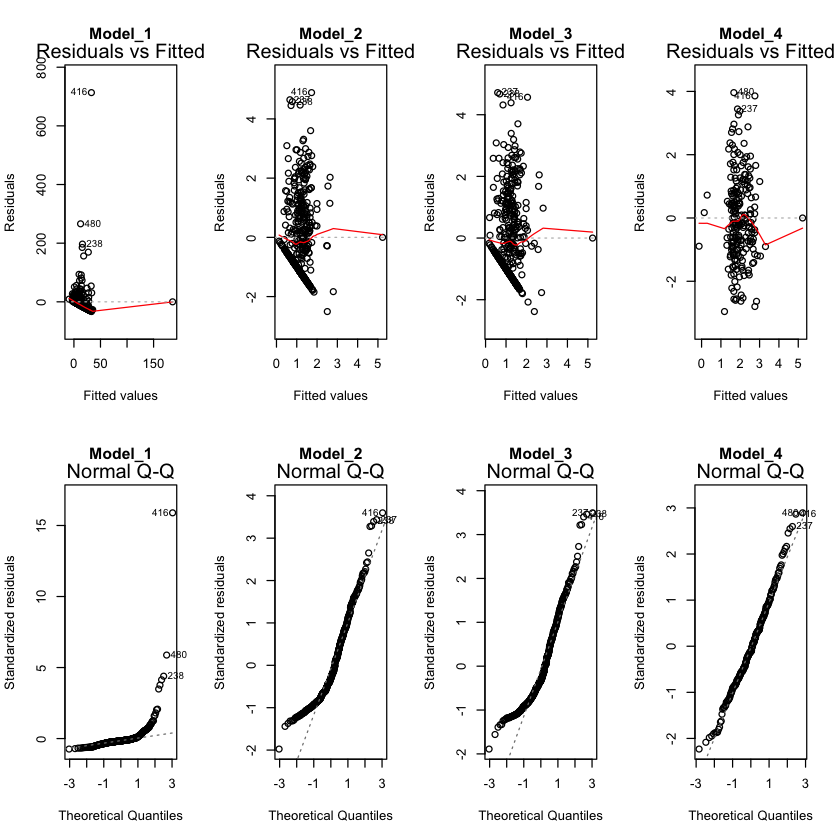

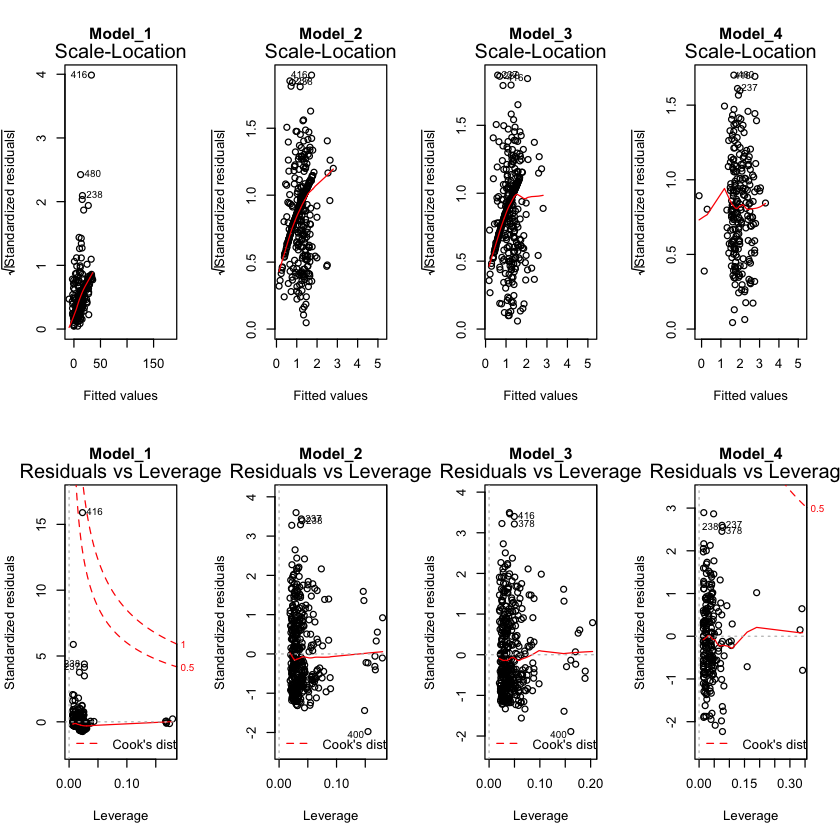

In [35]:
par(mfrow=c(2,4))
plot(model_1_step, which = 1,main='Model_1')
plot(model_2_step, which = 1,main='Model_2')
plot(model_3_step, which = 1,main='Model_3')
plot(model_4_linear_step, which = 1,main='Model_4')
plot(model_1_step, which = 2,main='Model_1')
plot(model_2_step, which = 2,main='Model_2')
plot(model_3_step, which = 2,main='Model_3')
plot(model_4_linear_step, which = 2,main='Model_4')

par(mfrow=c(2,4))
plot(model_1_step, which = 3,main='Model_1')
plot(model_2_step, which = 3,main='Model_2')
plot(model_3_step, which = 3,main='Model_3')
plot(model_4_linear_step, which = 3,main='Model_4')
plot(model_1_step, which = 5,main='Model_1')
plot(model_2_step, which = 5,main='Model_2')
plot(model_3_step, which = 5,main='Model_3')
plot(model_4_linear_step, which = 5,main='Model_4')

**According to the graphs:**

* **Linearity(Residuals vs Fitted)**:
    * The residuals in these four modles are all not equally spread around a horizontal line without distinct pattern. It means these three models could be a non-linear relationship, because the residuals in these three models are not scattered evenly.
<br> 
<br> 
* **Normality(Normal Q-Q)**:
    * In the fourth moedl, all the points fall approximately along this reference line and the model seems to follow a normal distribution reasonably well, except in the extreme tails. Therefore we can assume the fourth model is normality.
    <br> 
    <br> 
    * The distribution of residuals in first modle is like a heavy-tailed distribution.
    <br> 
    <br> 
    * The distribution of residuals in second and third modle is like a right skewed distribution.
    <br> 
    <br> 
    * The first, second, and third models are not normally distributed.
    <br>
    <br> 
    
* **Constant variance(Scale-Location)**:
    * All residuals in these four models appear not randomly spread.
    <br> 
    <br> 
    * The constant variance in second and three model is similar.
<br>
<br>
* **Residuals vs Leverage**:
    * In first model, the sample(416) is outside of the Cook's distance. It's means this sample is influential to the regression results.
    <br>
    <br>
    * In second, third, and fourth model, all cases are well inside of the Cook's distance lines. Therefore no influential cases are observed in these three models.

### RMSE and MAE in test data<a class="anchor" id="sec_4_3"></a>
In this part, we will calculate the Root mean squared error(RMSE) and Mean Absolute Error(MAE) for each models in test data set.

In [36]:
# define RMSE function to calculate the RMSE value
RMSE <- function(predicted, target) {
    se <- 0
    for (i in 1:length(predicted)) {
        se <- se + (predicted[i]-target[i])^2
    }
    return (sqrt(se/length(predicted)))
}

In [37]:
# define MAE function to calculate the MAE value
MAE <- function(predicted, target) {
    ae <- 0
    for (i in 1:length(predicted)) {
        ae <- ae + abs(predicted[i]-target[i])
    }
    return (ae/length(predicted))
}

In [38]:
#get the predict in model 1
model_1_area_predict<- predict(model_1_step, test)
#get the predict in model 2
model_2_area_predict<- predict(model_2_step, test)
#get the predict in model 3
model_3_area_predict<- predict(model_3_step, test)
#get the predict in model 4
logistic_predict <- predict(model_4_logistic_step, test, type = "response")
linear_predict <- predict(model_4_linear_step, test)
model_4_area_predict <- logistic_predict*linear_predict

df1 <- data.frame("Model" = c('model_1','model_2','model_3','model_4'),
                "RMSE" = c(RMSE(model_1_area_predict,test$area),RMSE(model_2_area_predict,test$area),RMSE(model_3_area_predict,test$area),RMSE(model_4_area_predict,test$area)),
                "MAE" = c(MAE(model_1_area_predict,test$area),MAE(model_2_area_predict,test$area),MAE(model_3_area_predict,test$area),MAE(model_4_area_predict,test$area))
                )
df1

Model,RMSE,MAE
model_1,107.8996,23.75325
model_2,108.3035,15.47124
model_3,108.3117,15.47266
model_4,108.2930,15.42053


**According to the table:**
* The first model has highest MAE value than other models. 
* The second model and third model have similar RMSE and MAE value in the test data set. It means these two models express similar average model prediction error.
* The fourth model has loweset MAE than other models.


## 5. Conclusion <a class="anchor" id="sec_6"></a>

- In the First model, we could see the attribute of Y8 seems to has a significant impact on the prediction of the burned area than other attributes in this model. This is because, the p-value of Y8 in the first model is 0.00040 that could reject the null hypothesis.  However, the first model has the highest Residual standard error and lowest adjusted R-squared value than other models. Therefore, the First model is not a useable model.
<br>
<br>
- In the Second model, we could see the attributes of X3, X9, Y4, Y8 seems to have a significant impact on the prediction of the burned area than other attributes in this model. This is because these attributes have samll p-value less than 0.05. Besides the adjusted R-squared value of second model is 0.061 that means it could only explain 6% of the variation in forest fire area.
<br>
<br>
- In the Third model, we could see the attributes of X3, X9, Y8, Y9, DMC, DMC:temp seems to have a significant impact on the prediction of the burned area than other attributes in this model. This is because all these attributes have samll p-value less than 0.05. Besides the adjusted R-squared value of second model is 0.064 that means it could only explain 6% of the variation in forest fire area, and this value is similar as the second model.
<br>
<br>
- In the Fourth model, we could see the attributes of Y8, Y9, RH, and log(RH) seem to have a significant impact on the prediction of the burned area than other attributes in this model. This is because all these attributes have samll p-value less than 0.05. Besides the adjusted R-squared value of second model has the highest value of 0.0873 that means it could only explain 8.73% of the variation in forest fire area.
<br>
<br>
As stated above, the y-axis spatial coordinate of 8 in Montesinho park map seems to has a significant impact on the prediction of the burned area, because Y8 has small p-value in all these four models. However, all these four model have very small adjusted R-squared value. Therefore, it seems have other attributes that could impact the prediction of the burned area not include in the data set.